## exercicio 2

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_classes = 2

In [3]:
modelo_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))



94765736/94765736 [==============================] - 5s 0us/step


In [4]:
for layer in modelo_base.layers:
    layer.trainable = False

In [5]:
modelo = tf.keras.Sequential(
    [modelo_base,
     GlobalAveragePooling2D(),
     Dense(1024, activation="relu"),
     Dense(num_classes, activation = 'softmax')
    ])

In [21]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [23]:
path = "E:/visao_am/imagens/dc_small/"

In [24]:
def cria_dataframe(caminho):
    arquivos = []
    rotulos = []
    for arquivo in os.listdir(caminho):
        if arquivo.startswith('cat'):
            rotulos.append('cat')
        elif arquivo.startswith('dog'):
            rotulos.append('dog')
        arquivos.append(arquivo)
    return pd.DataFrame({'arquivo':arquivos, 'rotulo':rotulos})

In [26]:
df_dados = cria_dataframe(os.path.join(path, 'train'))

In [28]:
train_df, validation_df = train_test_split(df_dados, test_size = 0.2, stratify = df_dados['rotulo'])

In [30]:
test_df = cria_dataframe(os.path.join(path, 'test'))

In [32]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [39]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=os.path.join(path, 'train'),
    x_col = 'arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1600 validated image filenames belonging to 2 classes.


In [42]:
validation_generator = train_datagen.flow_from_dataframe(
    validation_df,
    directory=os.path.join(path, 'train'),
    x_col = 'arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 400 validated image filenames belonging to 2 classes.


In [45]:
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    directory=os.path.join(path, 'test'),
    x_col = 'arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1000 validated image filenames belonging to 2 classes.


In [47]:
modelo.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs = 2
)

Epoch 1/2
50/50 [==============================] - 57s 1s/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.1016 - val_accuracy: 0.9740
Epoch 2/2
50/50 [==============================] - 57s 1s/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0775 - val_accuracy: 0.9818


In [50]:
test_loss, test_accuracy = modelo.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: {test_accuracy}')

31/31 [==============================] - 28s 900ms/step - loss: 0.0614 - accuracy: 0.9808
Acurácia no teste: 0.9808467626571655


In [55]:
path_n = "C:/Users/IFAM_CMZL/Downloads/imgs/teste/"

In [54]:
df_dados.tail(10)

,arquivo,rotulo
1990,dog.990.jpg,dog
1991,dog.991.jpg,dog
1992,dog.992.jpg,dog
1993,dog.993.jpg,dog
1994,dog.994.jpg,dog
1995,dog.995.jpg,dog
1996,dog.996.jpg,dog
1997,dog.997.jpg,dog
1998,dog.998.jpg,dog
1999,dog.999.jpg,dog


In [60]:
img_cao_1 = path_n+"cao_1.jpg"
img_cao_1 = image.load_img(img_cao_1, target_size=(224,224))
img_gato_1 = path_n+"gato_2_fei.jpg"
img_gato_1 = image.load_img(img_gato_1, target_size=(224,224))

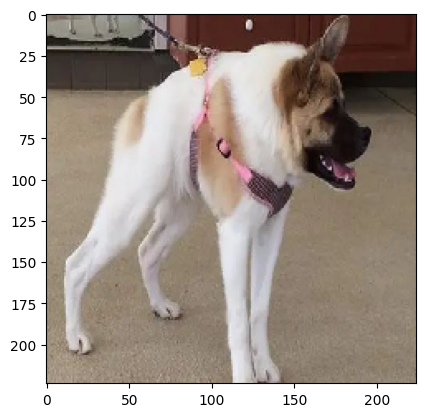

In [64]:
plt.imshow(img_cao_1)

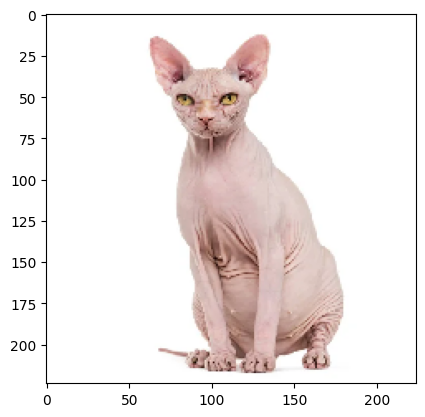

In [66]:
plt.imshow(img_gato_1)

In [69]:
img_p = image.img_to_array(img_cao_1)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [88]:
pred = modelo.predict(img_p)
resultado_classe = np.argmax(pred[0])

1/1 [==============================] - 0s 81ms/step


In [89]:
classes = ['cat', 'dog']

In [91]:
print('Predição: ', classes[resultado_classe])

Predição:  dog


In [92]:
def prediz(img):
    img_p = image.img_to_array(img)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição: ', classes[resultado_classe])


In [94]:
prediz(img_gato_1)

1/1 [==============================] - 0s 79ms/step
Predição:  cat


In [110]:
img_cao_2 = path_n+"cachorro_1.jpg"
img_cao_2 = image.load_img(img_cao_2, target_size=(224,224))
img_gato_2 = path_n+"gato_fei_3.jpg"
img_gato_2= image.load_img(img_gato_2, target_size=(224,224))

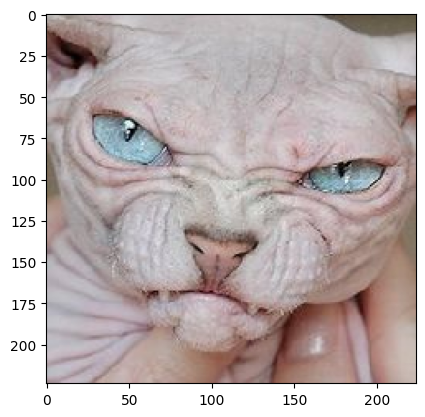

In [111]:
plt.imshow(img_gato_2)

In [112]:
prediz(img_gato_2)

1/1 [==============================] - 0s 78ms/step
Predição:  cat


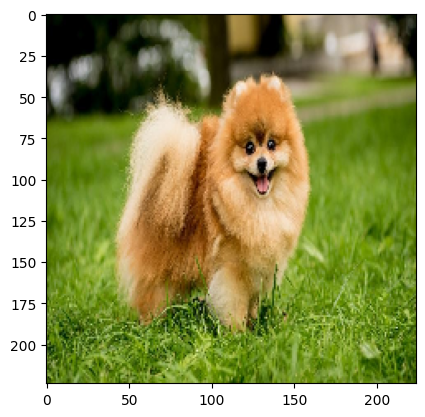

In [114]:
plt.imshow(img_cao_2)

In [116]:
prediz((img_gato_2))

1/1 [==============================] - 0s 82ms/step
Predição:  cat
